# EU Cohesion Analysis Report
Offline analysis based on processed panel outputs only.

In [1]:
from pathlib import Path
import pandas as pd
from IPython.display import display, Markdown, Image

root = Path('..').resolve()
panel = pd.read_parquet(root / 'data/processed/panel_master.parquet')
sigma = pd.read_csv(root / 'data/processed/sigma_convergence.csv')
overview = pd.read_csv(root / 'outputs/tables/panel_master_overview.csv')
missingness = pd.read_csv(root / 'outputs/tables/panel_master_key_missingness.csv')
twfe = pd.read_csv(root / 'outputs/tables/twfe_main_results.csv')
lags = pd.read_csv(root / 'outputs/tables/dl_lags_results.csv')
beta = pd.read_csv(root / 'outputs/tables/beta_convergence_results.csv')
summary = pd.read_csv(root / 'outputs/tables/model_comparison_summary.csv')
display(Markdown('## Dataset Coverage'))
display(overview)
display(Markdown('## Key Missingness Rates'))
display(missingness.sort_values('missing_rate', ascending=False))

## Dataset Coverage

,metric,value
0,min_year,1986
1,max_year,2025
2,n_regions,398
3,n_rows,15920


## Key Missingness Rates

,variable,missing_rate
6,gdp_pc_growth,0.876947
4,erdf_eur_pc_l3,0.859296
5,gdp_pc,0.858731
8,rd_gerd,0.854899
7,gva,0.852261
3,erdf_eur_pc_l2,0.840578
2,erdf_eur_pc_l1,0.823053
1,erdf_eur_pc,0.805465
10,unemp_rate,0.767085
9,tertiary_share_25_64,0.765578


## Main Causal Results
Model A/B estimate GDP per capita growth on lagged ERDF treatment with region FE and either year FE or country-year FE.

In [2]:
display(twfe)
display(lags)
display(summary)

,model,term,coef,std_err,t_stat,p_value,ci_95_lower,ci_95_upper,n_obs,n_regions,fe_type,clustering,sample_year_min,sample_year_max,controls_used
0,Model A,erdf_eur_pc_l1,0.002075,0.003657,0.567288,5.705185e-01,-0.005093,0.009242,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
1,Model A,unemp_rate,-0.640669,0.121539,-5.271300,1.354607e-07,-0.878881,-0.402457,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
2,Model A,emp_rate,-0.163489,0.126392,-1.293508,1.958355e-01,-0.411213,0.084235,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
3,Model A,tertiary_share_25_64,-0.166689,0.107355,-1.552684,1.204987e-01,-0.377102,0.043724,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
4,Model A,rd_gerd,-0.569575,0.606508,-0.939106,3.476764e-01,-1.758309,0.619159,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
5,Model A,gva,0.119343,0.030732,3.883378,1.030150e-04,0.059110,0.179577,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
6,Model B,erdf_eur_pc_l1,0.003646,0.004183,0.871637,3.834066e-01,-0.004553,0.011846,1175,223,country_year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
7,Model B,unemp_rate,-0.058207,0.165659,-0.351366,7.253138e-01,-0.382891,0.266478,1175,223,country_year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
8,Model B,emp_rate,-0.042166,0.148066,-0.284777,7.758151e-01,-0.332369,0.248038,1175,223,country_year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
9,Model B,tertiary_share_25_64,-0.118761,0.089147,-1.332193,1.827967e-01,-0.293486,0.055964,1175,223,country_year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."


,model,term,coef,std_err,t_stat,p_value,ci_95_lower,ci_95_upper,n_obs,n_regions,fe_type,clustering,sample_year_min,sample_year_max,controls_used
0,Model C,erdf_eur_pc_l1,0.009876,0.005234,1.886848,0.059181,-0.000383,0.020134,861,223,year,nuts2,2019,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
1,Model C,erdf_eur_pc_l2,0.013992,0.005052,2.769339,0.005617,0.004089,0.023894,861,223,year,nuts2,2019,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
2,Model C,erdf_eur_pc_l3,0.005599,0.003791,1.476964,0.139685,-0.001831,0.013029,861,223,year,nuts2,2019,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
3,Model C,unemp_rate,-0.520235,0.175876,-2.957972,0.003097,-0.864945,-0.175525,861,223,year,nuts2,2019,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
4,Model C,emp_rate,-0.165548,0.182064,-0.909281,0.363202,-0.522387,0.191292,861,223,year,nuts2,2019,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
5,Model C,tertiary_share_25_64,-0.195186,0.148776,-1.311953,0.189536,-0.486781,0.096408,861,223,year,nuts2,2019,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
6,Model C,rd_gerd,-0.900912,0.943388,-0.954975,0.339590,-2.749919,0.948095,861,223,year,nuts2,2019,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
7,Model C,gva,0.199430,0.056438,3.533629,0.000410,0.088814,0.310046,861,223,year,nuts2,2019,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."


,model,key_term,coef,std_err,p_value,ci_95_lower,ci_95_upper,n_obs,n_regions,fe_type,clustering,sample_year_min,sample_year_max,outlier_rule,outlier_threshold,balanced_window_start,balanced_window_end,balanced_regions
0,Model A,erdf_eur_pc_l1,0.002075,0.003657,5.705185e-01,-0.005093,0.009242,1175,223,year,nuts2,2017,2023,drop global top 1% erdf_eur_pc,264.108343,2017,2023,115
1,Model A (balanced panel),erdf_eur_pc_l1,0.000831,0.003698,8.221802e-01,-0.006417,0.008079,805,115,year,nuts2,2017,2023,drop global top 1% erdf_eur_pc,264.108343,2017,2023,115
2,Model A (outliers excluded),erdf_eur_pc_l1,0.001566,0.003752,6.765033e-01,-0.005789,0.008920,1156,223,year,nuts2,2017,2023,drop global top 1% erdf_eur_pc,264.108343,2017,2023,115
3,Model A (scaled treatment),erdf_k_eur_pc_l1,2.074502,3.656877,5.705185e-01,-5.092844,9.241849,1175,223,year,nuts2,2017,2023,drop global top 1% erdf_eur_pc,264.108343,2017,2023,115
4,Model A (two-way cluster),erdf_eur_pc_l1,0.002075,0.004854,6.690909e-01,-0.007439,0.011588,1175,223,year,nuts2_country,2017,2023,drop global top 1% erdf_eur_pc,264.108343,2017,2023,115
5,Model B,erdf_eur_pc_l1,0.003646,0.004183,3.834066e-01,-0.004553,0.011846,1175,223,country_year,nuts2,2017,2023,drop global top 1% erdf_eur_pc,264.108343,2017,2023,115
6,Model B (balanced panel),erdf_eur_pc_l1,0.003035,0.004288,4.790867e-01,-0.005370,0.011440,805,115,country_year,nuts2,2017,2023,drop global top 1% erdf_eur_pc,264.108343,2017,2023,115
7,Model B (outliers excluded),erdf_eur_pc_l1,0.003614,0.004560,4.280227e-01,-0.005323,0.012550,1156,223,country_year,nuts2,2017,2023,drop global top 1% erdf_eur_pc,264.108343,2017,2023,115
8,Model B (scaled treatment),erdf_k_eur_pc_l1,3.646393,4.183386,3.834066e-01,-4.552894,11.845679,1175,223,country_year,nuts2,2017,2023,drop global top 1% erdf_eur_pc,264.108343,2017,2023,115
9,Model B (two-way cluster),erdf_eur_pc_l1,0.003646,0.005675,5.205180e-01,-0.007476,0.014769,1175,223,country_year,nuts2_country,2017,2023,drop global top 1% erdf_eur_pc,264.108343,2017,2023,115


## Convergence Results
- Beta convergence: negative `log_gdp_pc_l1` supports convergence.
- Interaction term in Model E indicates whether ERDF effects vary by initial income.

In [3]:
display(beta)
display(sigma.head())

,model,term,coef,std_err,t_stat,p_value,ci_95_lower,ci_95_upper,n_obs,n_regions,fe_type,clustering,sample_year_min,sample_year_max,controls_used
0,Model D,log_gdp_pc_l1,-33.496325,2.507914,-13.356249,1.089153e-40,-38.411746,-28.580903,1959,285,year,nuts2,2017,2023,NaN
1,Model E,log_gdp_pc_l1,-24.160827,3.904634,-6.187732,6.103595e-10,-31.813768,-16.507886,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
2,Model E,erdf_eur_pc_l1,0.068788,0.072040,0.954852,3.396523e-01,-0.072408,0.209984,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
3,Model E,erdf_eur_pc_l1:log_gdp_pc_l1,-0.006854,0.007366,-0.930485,3.521201e-01,-0.021290,0.007583,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
4,Model E,unemp_rate,-0.362030,0.101469,-3.567889,3.598690e-04,-0.560905,-0.163154,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
5,Model E,emp_rate,-0.077590,0.109809,-0.706591,4.798206e-01,-0.292811,0.137631,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
6,Model E,tertiary_share_25_64,-0.254127,0.109073,-2.329883,1.981235e-02,-0.467906,-0.040348,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
7,Model E,rd_gerd,-0.762196,0.622446,-1.224517,2.207571e-01,-1.982169,0.457776,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
8,Model E,gva,0.257373,0.053312,4.827650,1.381538e-06,0.152883,0.361864,1175,223,year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."
9,Model E (country-year FE),log_gdp_pc_l1,-57.983705,5.316845,-10.905660,1.083043e-27,-68.404530,-47.562880,1175,223,country_year,nuts2,2017,2023,"unemp_rate,emp_rate,tertiary_share_25_64,rd_ge..."


,year,sigma_log_gdp,n_regions
0,1986,NaN,0
1,1987,NaN,0
2,1988,NaN,0
3,1989,NaN,0
4,1990,NaN,0


## Figures
### Dynamic Lag Response

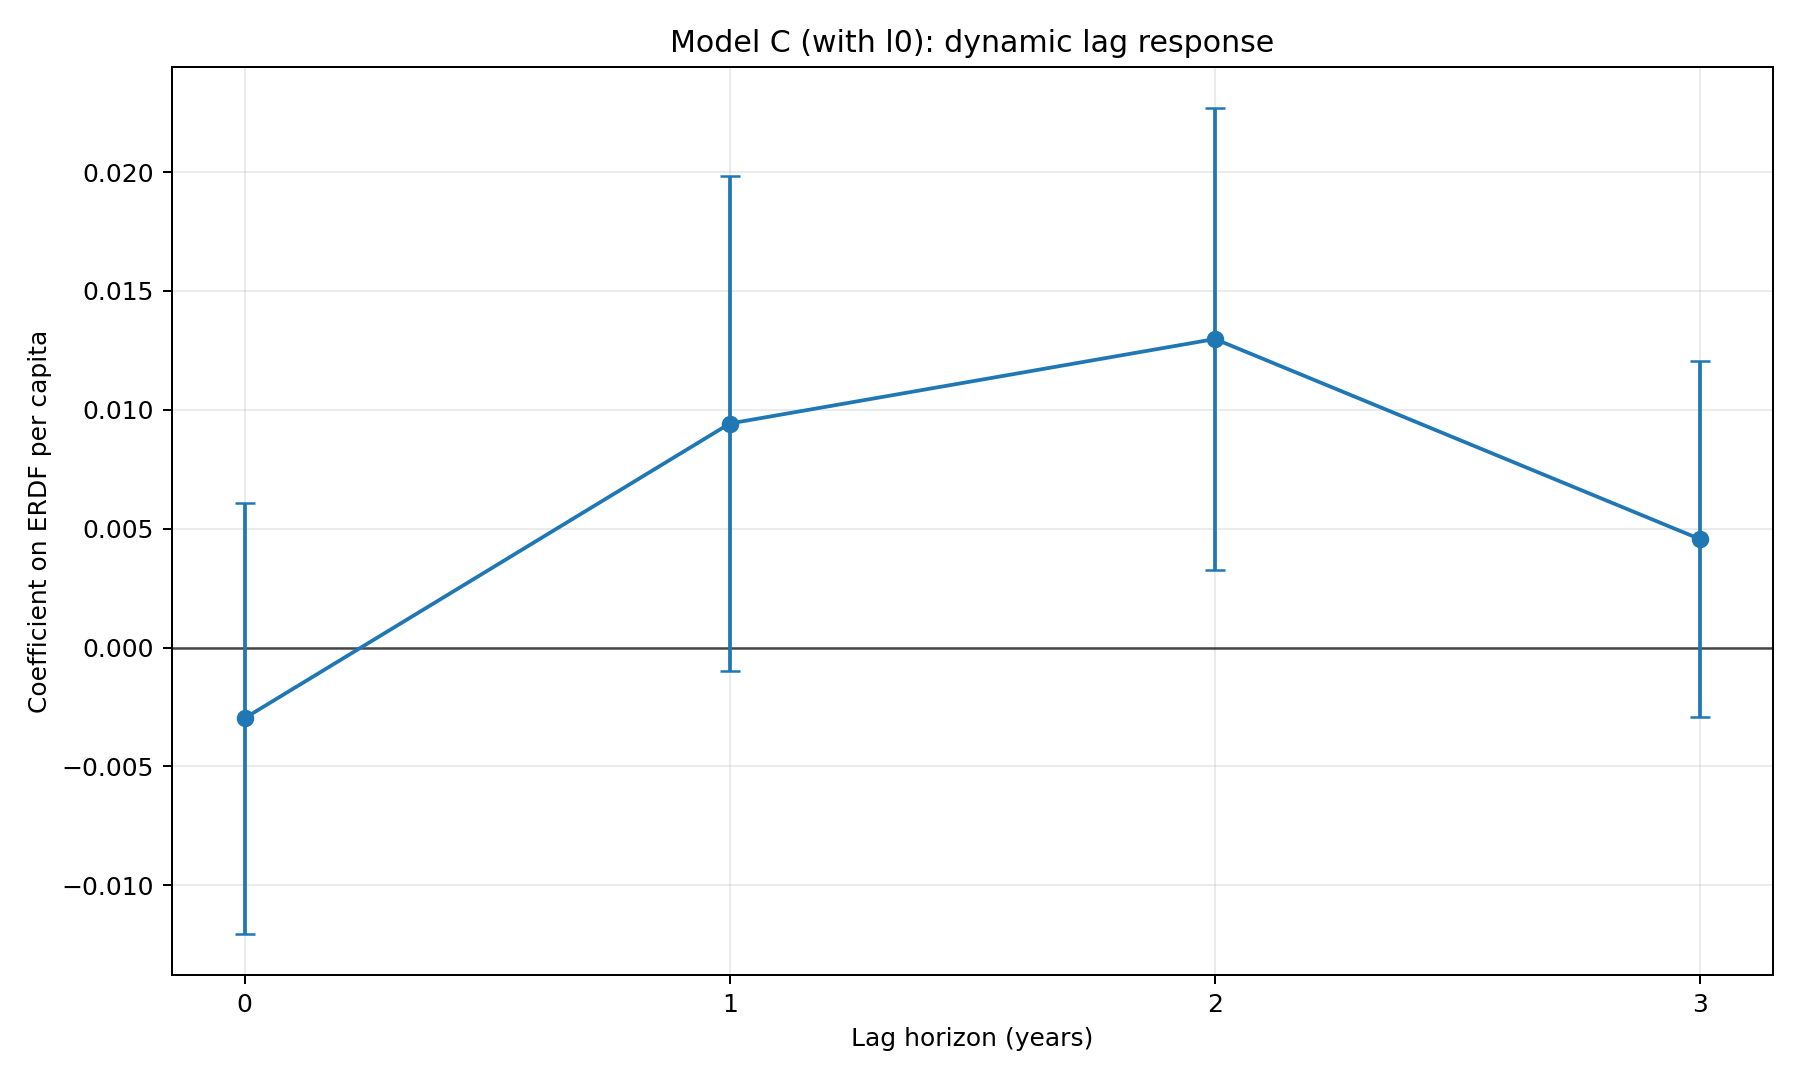

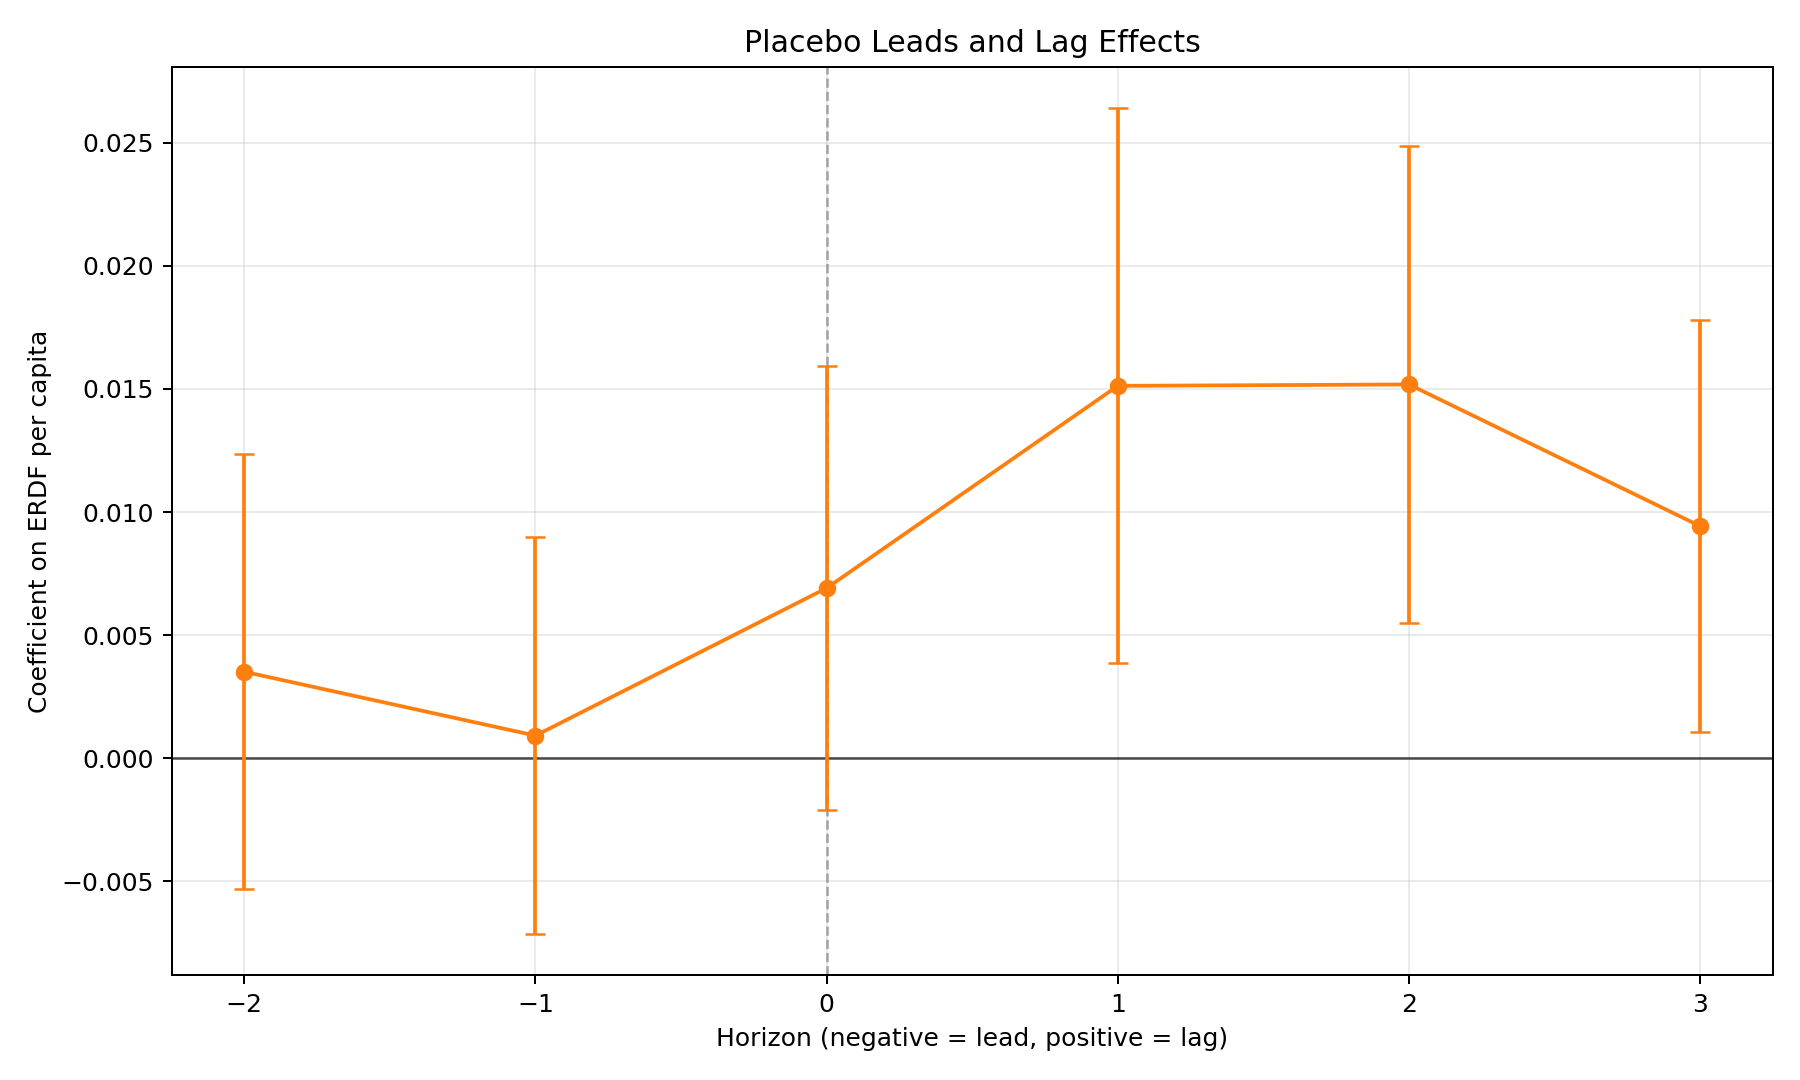

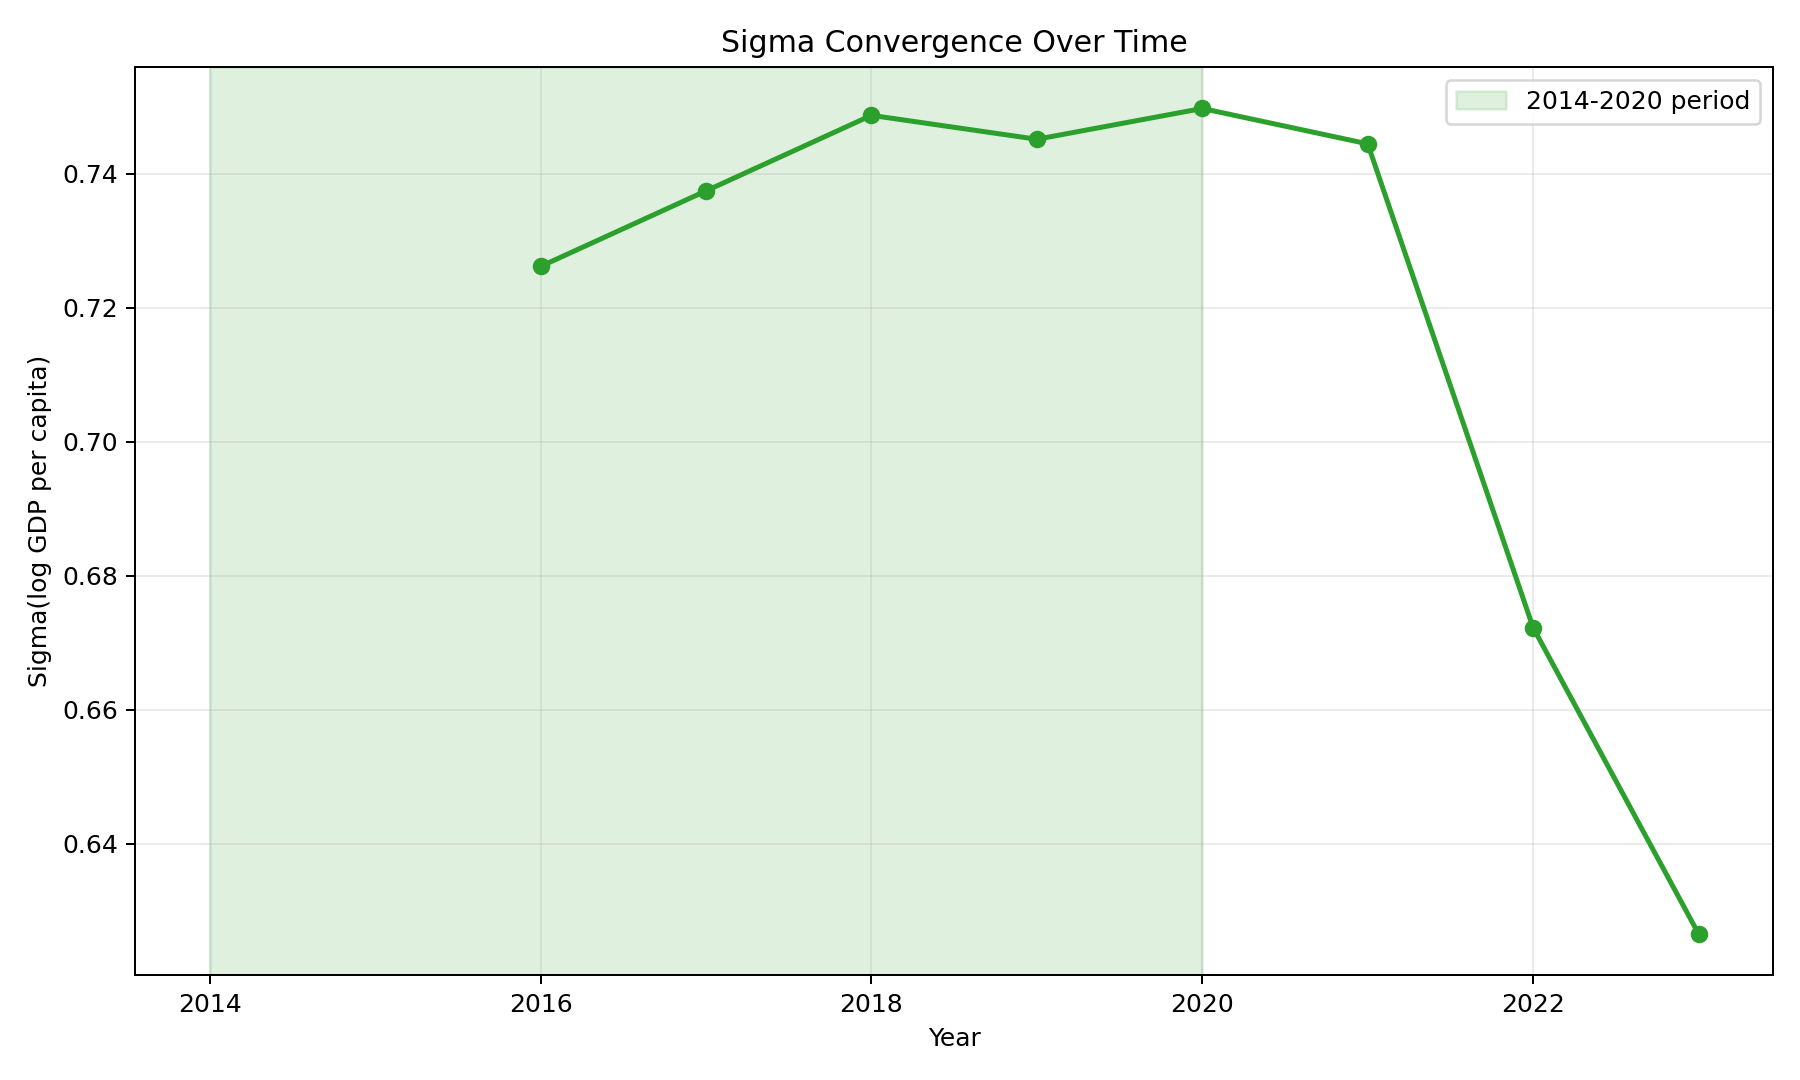

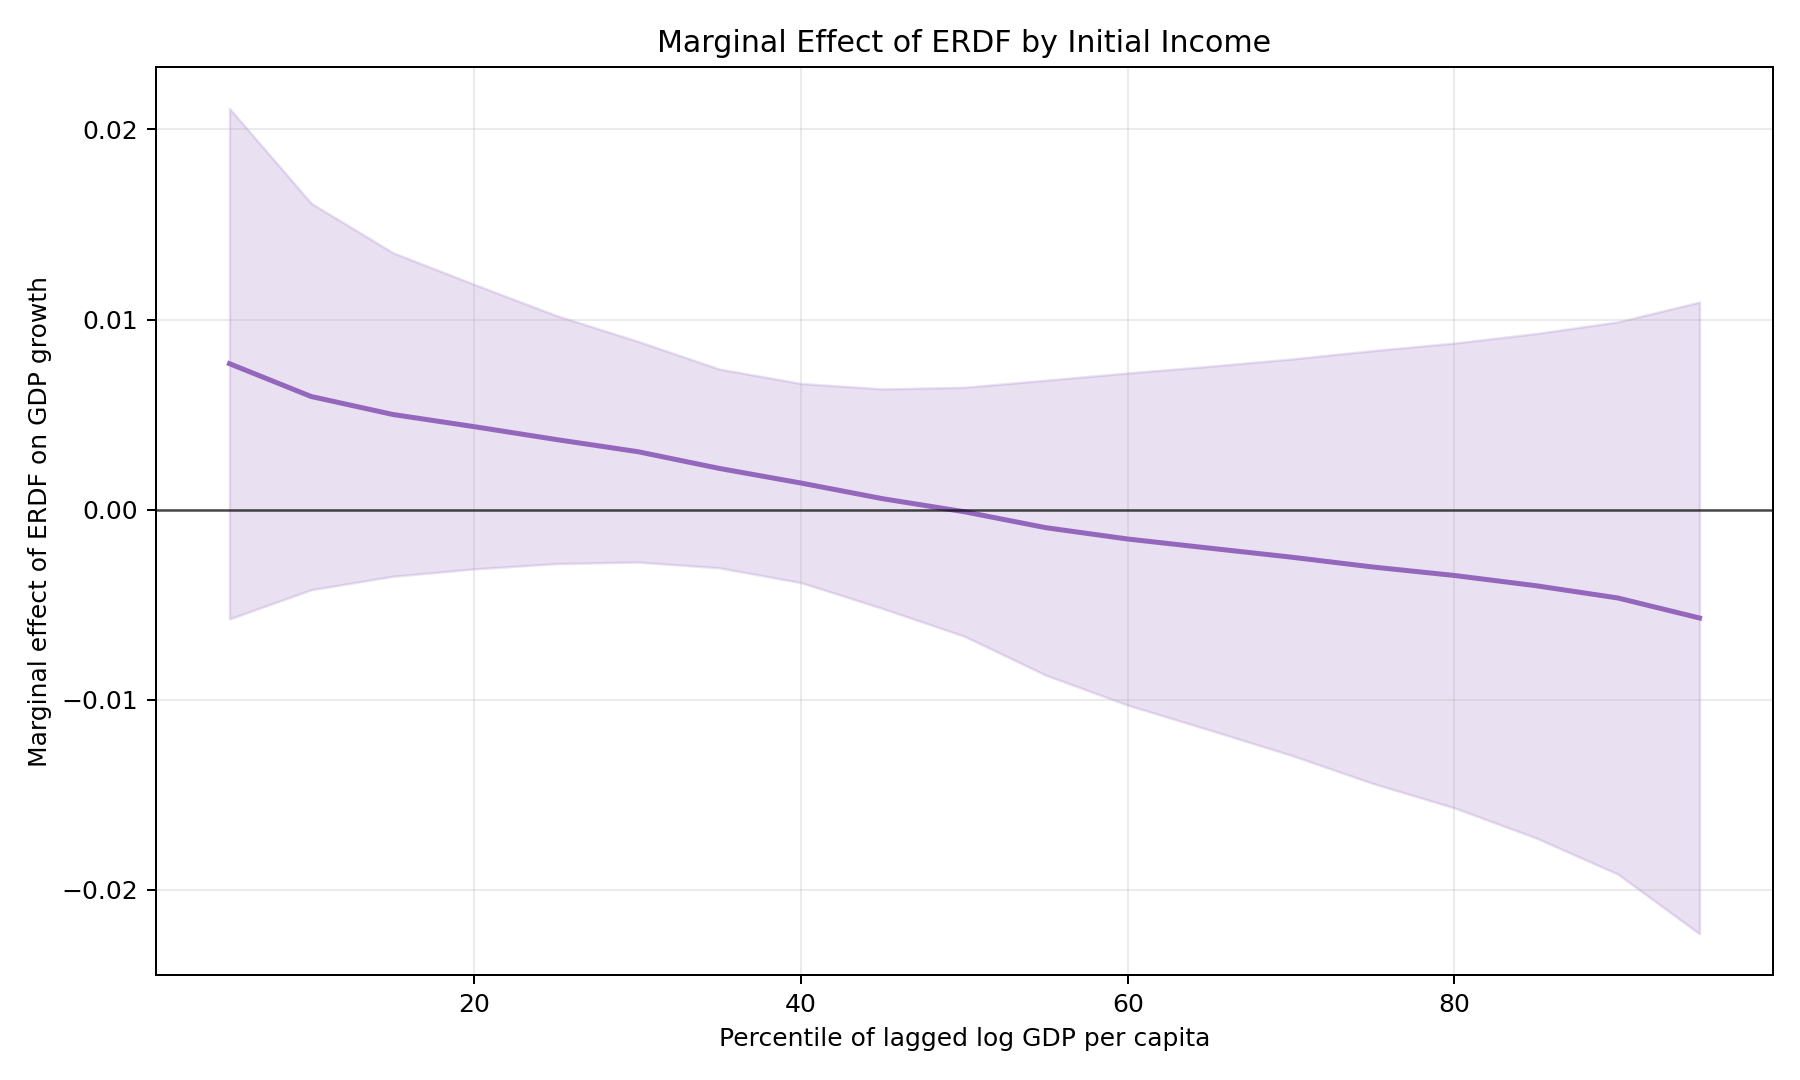

In [4]:
display(Image(filename=str(root / 'outputs/figures/dynamic_lag_response.png')))
display(Image(filename=str(root / 'outputs/figures/leads_lags_placebo.png')))
display(Image(filename=str(root / 'outputs/figures/sigma_convergence.png')))
display(Image(filename=str(root / 'outputs/figures/beta_convergence_partial.png')))

## Interpretation and Limitations
- GDP is currently based on nominal `MIO_EUR`; effect sizes should be interpreted cautiously.
- `category_2014_2020` is currently missing, so category-based heterogeneity is not estimated.
- Results are observational TWFE estimates with region and time fixed effects; remaining confounding may persist.